<a href="https://colab.research.google.com/github/JunaidLamture/CODSOFT/blob/main/Task2%20Movies%20IMDb%20Rating%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Necessary Libraries.

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
from google.colab import files
uploaded = files.upload()

Saving IMDb Movies India.csv to IMDb Movies India.csv


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snr
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

Import data and show first 10 rows of data.

In [17]:
data=pd.read_csv("/content/IMDb Movies India.csv", encoding='ISO-8859-1')
data.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,-1997.0,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,-2005.0,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,-2008.0,59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,-2012.0,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,-2014.0,116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


Calculate the statistical values and round them 3 decimal places.

Extract all information about data.

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB


Checking the shape of data.

In [48]:
data.shape

(15509, 10)

In [49]:
data.describe(include = 'all').round(3)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981.000,7240,13632,7919.000,7920,14984,13892,13125,12365
unique,13838,NaN,182,485,NaN,2034,5938,4718,4891,4820
top,Anjaam,NaN,120 min,Drama,NaN,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,NaN,240,2780,NaN,227,58,158,83,91
mean,NaN,-1987.012,NaN,NaN,5.842,NaN,NaN,NaN,NaN,NaN
std,NaN,25.417,NaN,NaN,1.382,NaN,NaN,NaN,NaN,NaN
min,NaN,-2022.000,NaN,NaN,1.100,NaN,NaN,NaN,NaN,NaN
25%,NaN,-2009.000,NaN,NaN,4.900,NaN,NaN,NaN,NaN,NaN
50%,NaN,-1991.000,NaN,NaN,6.000,NaN,NaN,NaN,NaN,NaN
75%,NaN,-1968.000,NaN,NaN,6.800,NaN,NaN,NaN,NaN,NaN


Drop Unnecessary Columns from data.

In [50]:
data_new = data.drop(['Name','Year','Genre','Director','Actor 1','Actor 2','Actor 3'], axis=1)
data_new.head()

,Duration,Rating,Votes
0,NaN,NaN,NaN
1,109 min,7.0,8
2,90 min,NaN,NaN
3,110 min,4.4,35
4,105 min,NaN,NaN


Replacing string values available in Column values by changing their data types.

In [51]:
data_new['Duration']=data_new['Duration'].str.replace(' min', '')
data_new['Votes']=data_new['Votes'].str.replace(',', '')
data_new['Votes']=data_new['Votes'].replace('$5.16M', 5.16)

In [52]:
data_new.head()

,Duration,Rating,Votes
0,NaN,NaN,NaN
1,109,7.0,8
2,90,NaN,NaN
3,110,4.4,35
4,105,NaN,NaN


Checking for null values.

In [53]:
data_new.isnull().sum()

Duration    8269
Rating      7590
Votes       7589
dtype: int64

Dropping all null values from data_new.

In [54]:
data_new.dropna(subset=['Duration','Votes','Rating'], inplace=True)

In [55]:
data_new.head()

,Duration,Rating,Votes
1,109,7.0,8
3,110,4.4,35
5,147,4.7,827
6,142,7.4,1086
8,82,5.6,326


Splitting the data into dependent and independent variables.

In [56]:
x=data_new.drop(['Rating'], axis=1)
y=data_new['Rating']

In [57]:
print(x)

      Duration Votes
1          109     8
3          110    35
5          147   827
6          142  1086
8           82   326
...        ...   ...
15493      115   408
15494      153  1496
15503      125    44
15505      129   655
15508      130    20

[5851 rows x 2 columns]


In [58]:
print(y)

1        7.0
3        4.4
5        4.7
6        7.4
8        5.6
        ... 
15493    6.1
15494    6.2
15503    5.8
15505    4.5
15508    6.2
Name: Rating, Length: 5851, dtype: float64


Splitting data into training and testing sets.

In [59]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.9, random_state=22)

Importing first machine learning model 'linear regression'.

In [60]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression()

train the model.

In [61]:
linear.fit(x_train, y_train)

LinearRegression()

Make predictions on model.

In [62]:
lin_pred=linear.predict(x_test)

Check accuracy score.

In [63]:
print(r2_score(y_test, lin_pred))

0.028032979070218844


Import boosting technique 'Gradient Boost Regressor'.

In [64]:
GBR=GradientBoostingRegressor(n_estimators=2500, learning_rate=0.8, random_state=22)

Train the boosting model.

In [33]:
GBR.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.8, n_estimators=2500, random_state=22)

Make predictions on model.

In [34]:
gbr_pred=GBR.predict(x_test)

Check accuracy score.

In [35]:
print(r2_score(y_test, gbr_pred))

-0.6293263269082745


Importing Machine learning model 'Decision Tree'.

In [36]:
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor(random_state=22)

Train the model.

In [37]:
tree.fit(x_train, y_train)

DecisionTreeRegressor(random_state=22)

Make predictions on model.

In [38]:
tree_pred=tree.predict(x_test)

Print accuracy score.

In [39]:
print(r2_score(y_test, tree_pred))

-0.8458911965167992


In [40]:
data2=data.dropna()
data2.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,-1997.0,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,-2005.0,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,-2012.0,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


<Figure size 2000x1800 with 0 Axes>

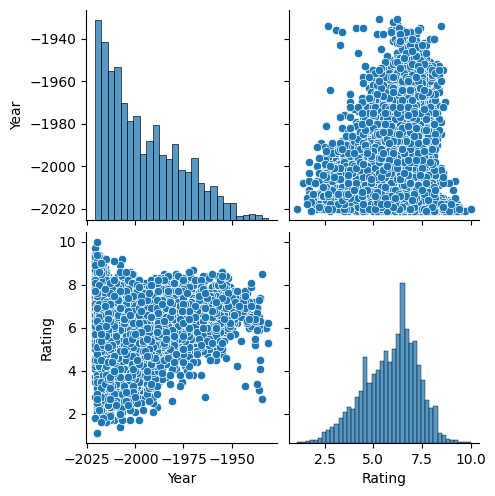

In [41]:
plt.figure(figsize=(20,18))
snr.pairplot(data2)
plt.xticks(rotation=90)
plt.show()

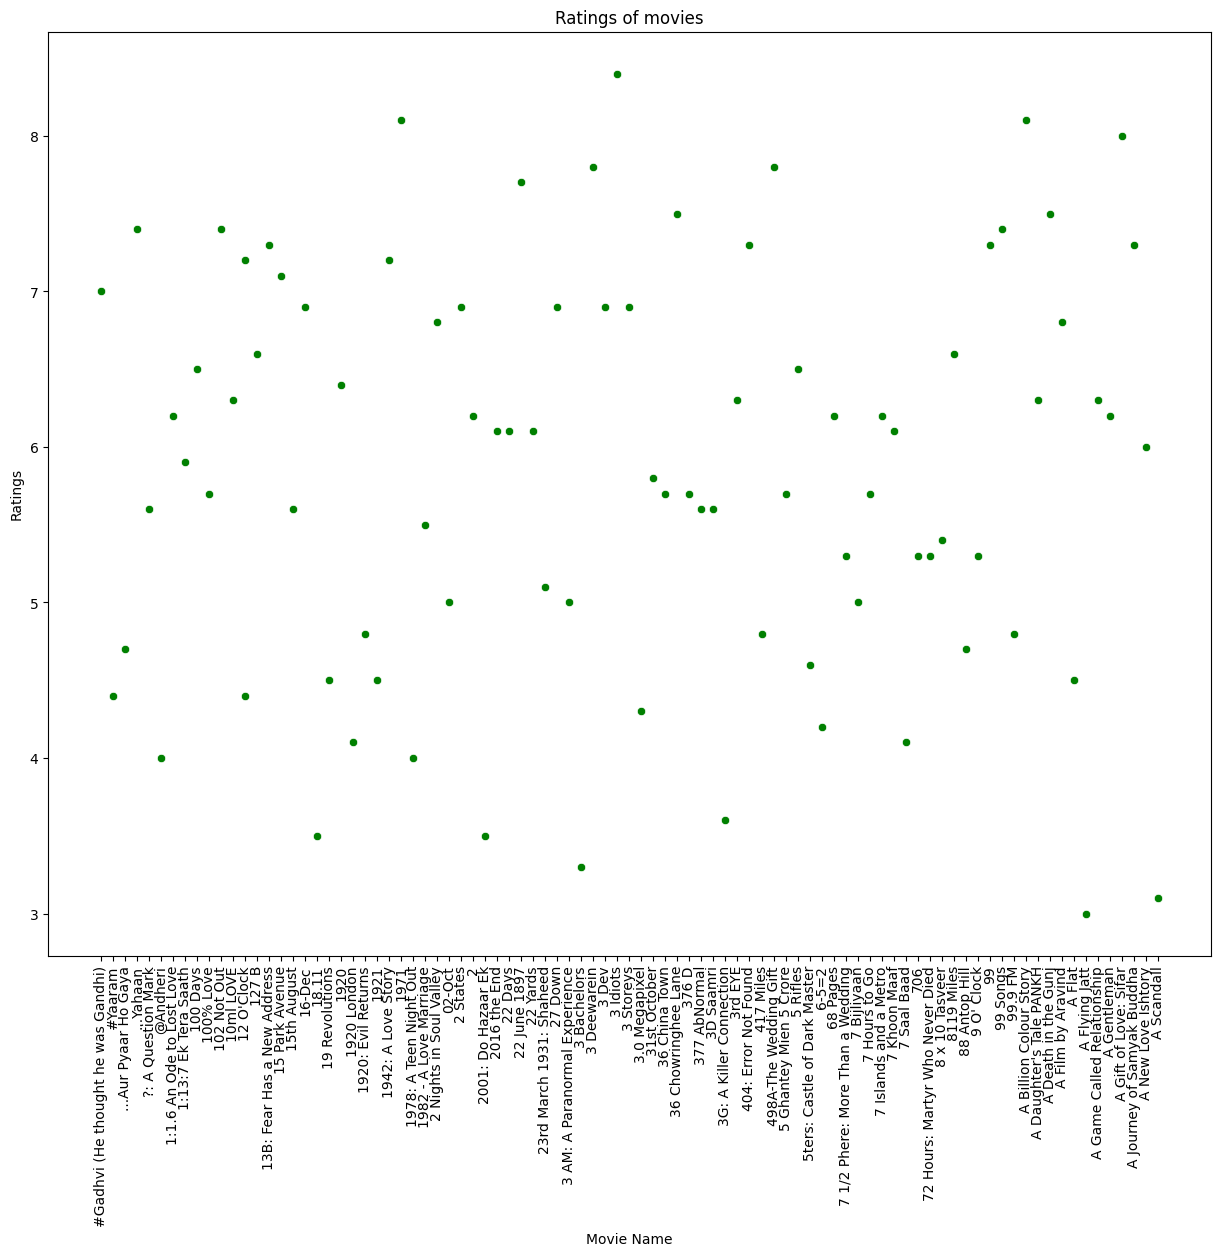

In [42]:
plt.figure(figsize=(15, 12))
snr.scatterplot(x='Name', y='Rating', data=data2.head(90), color='g')
plt.xticks(rotation=90)
plt.title('Ratings of movies')
plt.xlabel('Movie Name')
plt.ylabel('Ratings')
plt.show()

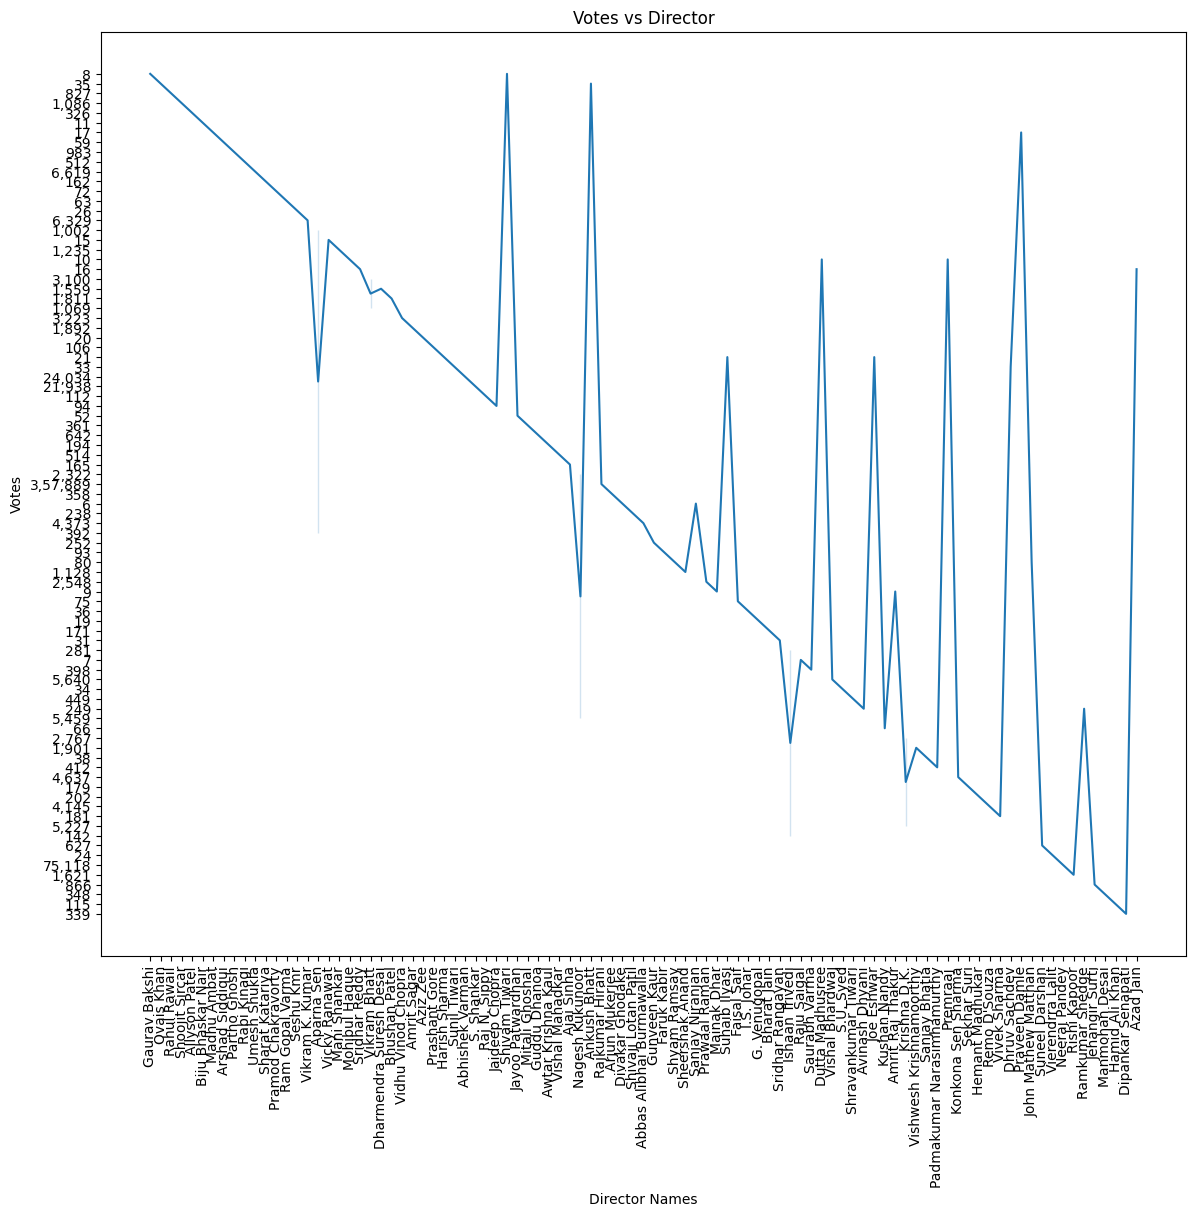

In [43]:
plt.figure(figsize=(14, 12))
snr.lineplot(x='Director', y='Votes', data=data2.head(100))
plt.xticks(rotation=90)
plt.title('Votes vs Director')
plt.xlabel('Director Names')
plt.ylabel('Votes')
plt.show()

<ipython-input-44-cdbce146c516>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  snr.barplot(data=data2.head(200), x='Genre', y='Rating', palette='dark')


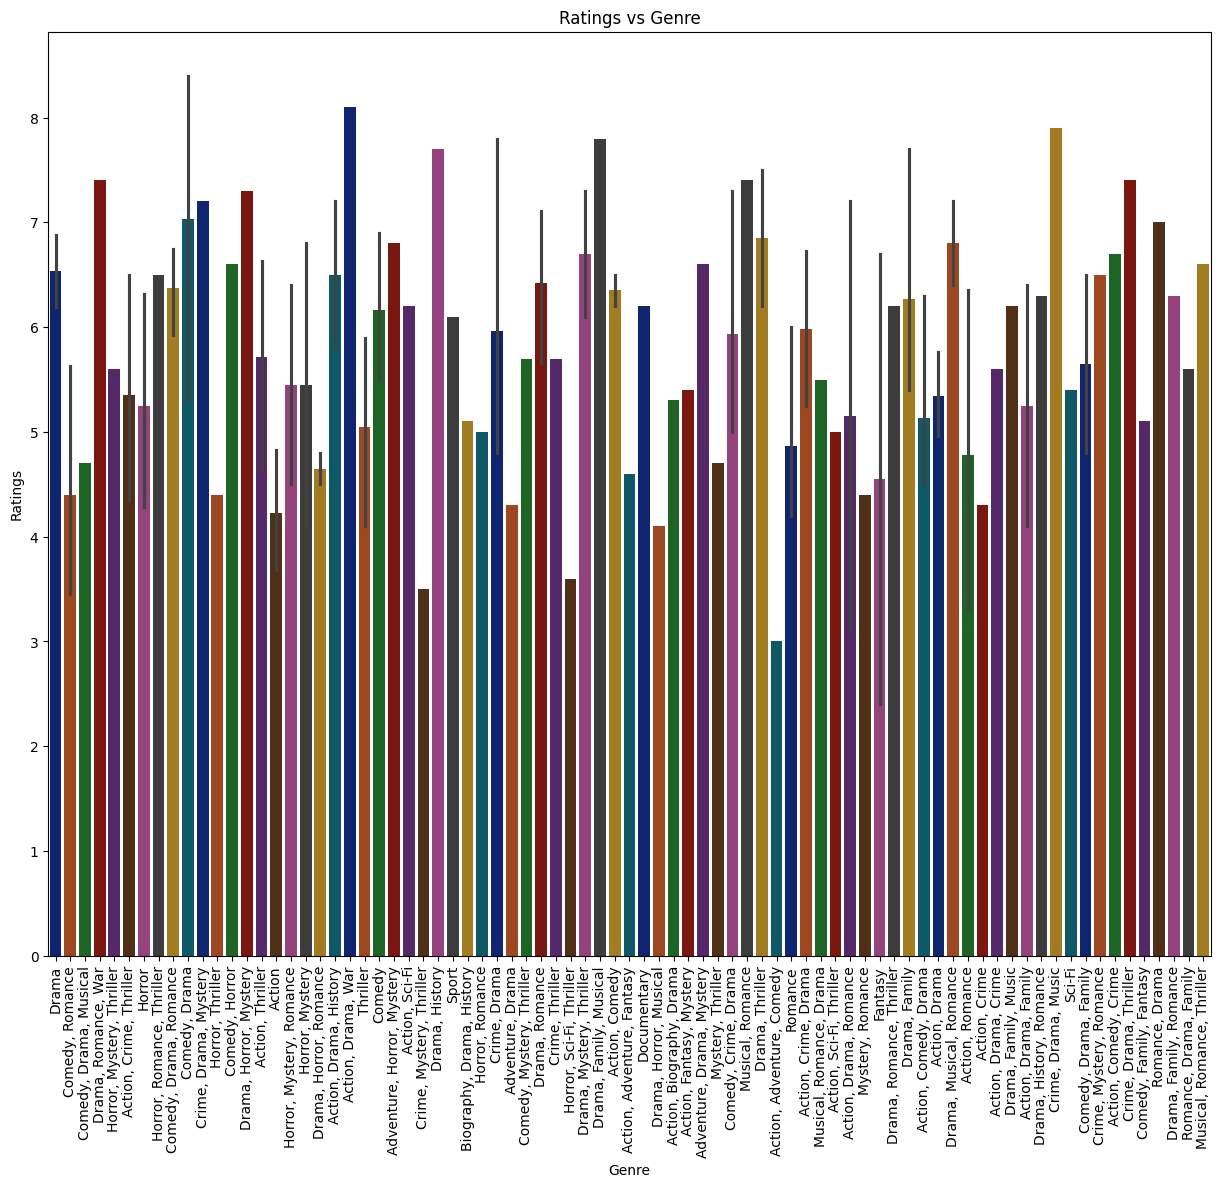

In [44]:
plt.figure(figsize=(15, 12))
snr.barplot(data=data2.head(200), x='Genre', y='Rating', palette='dark')
plt.xticks(rotation=90)
plt.title('Ratings vs Genre')
plt.xlabel('Genre')
plt.ylabel('Ratings')
plt.show()

<ipython-input-45-25d9316b34d2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  snr.distplot(data2['Rating'], color='g')


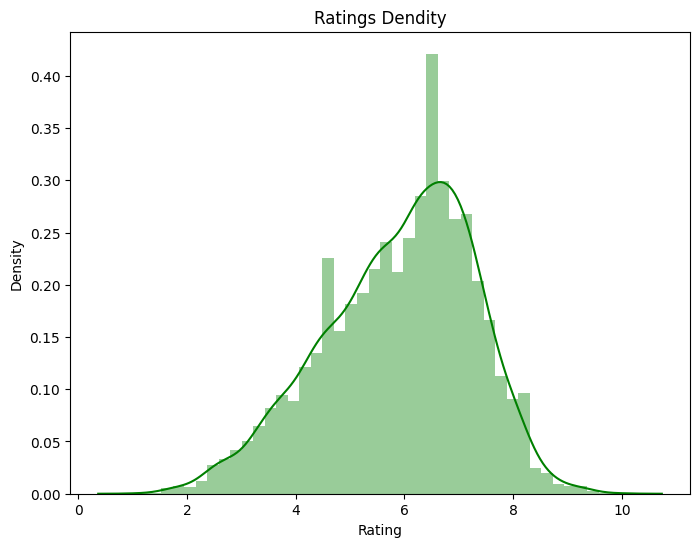

In [45]:
plt.figure(figsize=(8, 6))
snr.distplot(data2['Rating'], color='g')
plt.title('Ratings Dendity')
plt.show()

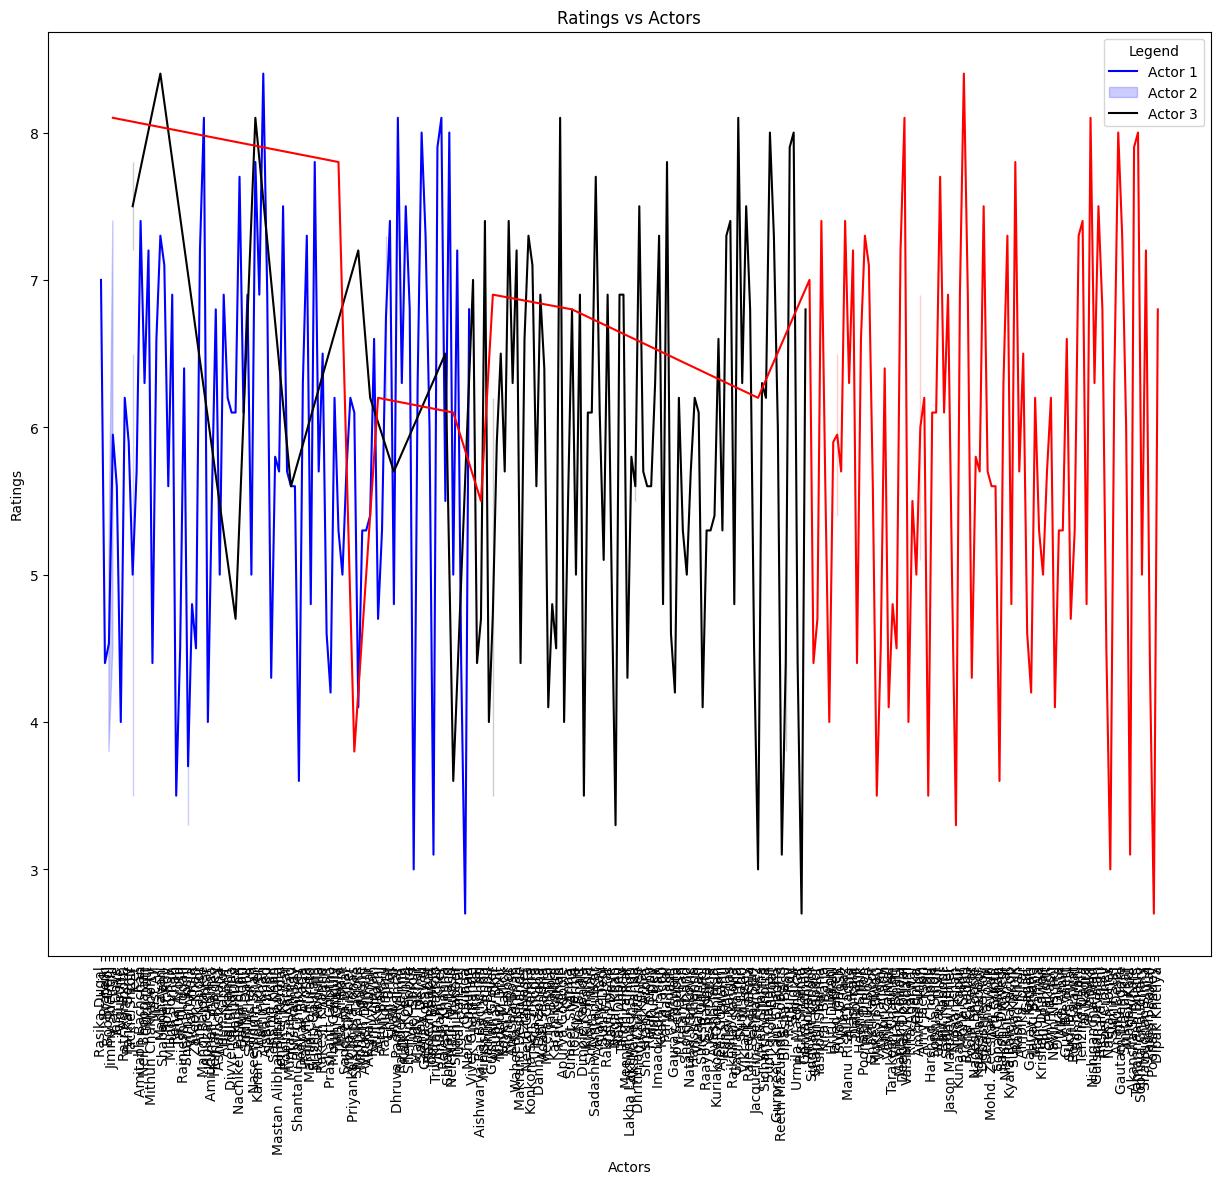

In [46]:
plt.figure(figsize=(15, 12))
snr.lineplot(data=data2.head(100), x='Actor 1', y='Rating', color='blue')
snr.lineplot(data=data2.head(100), x='Actor 2', y='Rating', color='black')
snr.lineplot(data=data2.head(100), x='Actor 3', y='Rating', color='red')
plt.legend(title='Legend', labels=['Actor 1', 'Actor 2', 'Actor 3'])
plt.xticks(rotation=90)
plt.title('Ratings vs Actors')
plt.xlabel('Actors')
plt.ylabel('Ratings')
plt.show()